<a href="https://colab.research.google.com/github/mrhamedani/Deep-learning-projects-Tensorflow/blob/main/3_MNIST_ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() #datasets.mnist for numbers 0-9 with labels
x_train, x_test = x_train / 255.0, x_test / 255.0  # normalize the data to [0,1] range instead of [0,255 colors] because model expects it

print(x_train.shape) # x is the image, y is the label
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train[0])
print(x_train[0])

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
5
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0. 

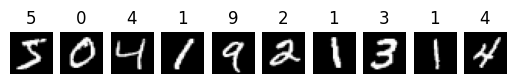

In [9]:
fig, ax = plt.subplots(1,10)
for i in range(10):
  ax[i].imshow(x_train[i], cmap='gray')
  ax[i].set_title(y_train[i])
  ax[i].axis('off')

plt.show()

In [10]:
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), # flattens layer to 1D because image is 28x28 pixels and model expects it
                                  tf.keras.layers.Dense(128, activation='relu'),
                                  tf.keras.layers.Dropout(0.2),
                                  tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) # categorical_crossentropy like binary_crossentropy but for more than 2 classes

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)  # one-hot encoding for labels because model expects it
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [12]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
for i in history.history:   # history method returns a dictionary of all the metrics
  print(i)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8596 - loss: 0.4859 - val_accuracy: 0.9587 - val_loss: 0.1374
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9567 - loss: 0.1455 - val_accuracy: 0.9697 - val_loss: 0.0976
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9676 - loss: 0.1072 - val_accuracy: 0.9753 - val_loss: 0.0836
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9740 - loss: 0.0853 - val_accuracy: 0.9765 - val_loss: 0.0751
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9770 - loss: 0.0739 - val_accuracy: 0.9788 - val_loss: 0.0689
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9792 - loss: 0.0651 - val_accuracy: 0.9782 - val_loss: 0.0738
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9816 - loss: 0.0577 - val_accuracy: 0.9794 - val_loss: 0.0681
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9838 - loss: 0.0493

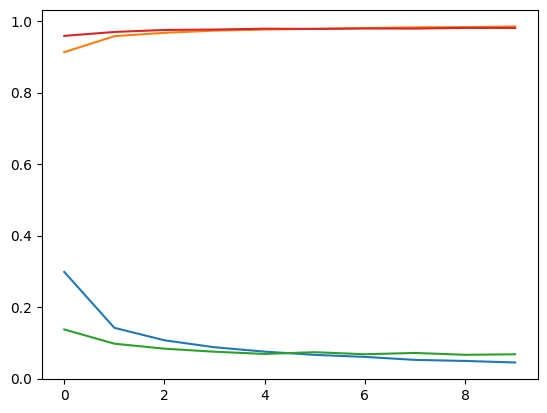

In [13]:
for x in ['loss','accuracy','val_loss','val_accuracy']:
  plt.plot(history.history[x])

## predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
6


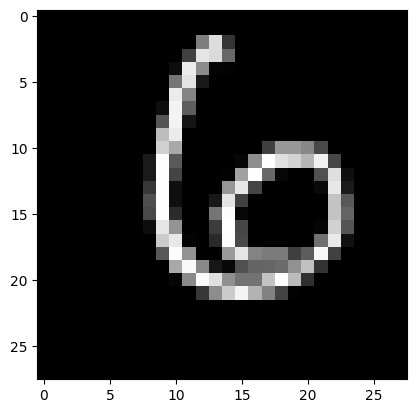

In [14]:
t= x_test[100]
p = model.predict(np.array([t]))
print(np.argmax(p))
plt.imshow(t, cmap='gray')